In [1]:
import pandas as pd

max_sharpe_portfolio = pd.DataFrame()
uniform_weights_port = pd.DataFrame()
train_choose = pd.DataFrame()
test_choose = pd.DataFrame()
a2c_train_daily_return = pd.DataFrame()
td3_train_daily_return = pd.DataFrame()
ppo_train_daily_return = pd.DataFrame()
ddpg_train_daily_return = pd.DataFrame()
sac_train_daily_return = pd.DataFrame()
a2c_test_returns = pd.DataFrame()
td3_test_returns = pd.DataFrame()
ppo_test_returns = pd.DataFrame()
ddpg_test_returns = pd.DataFrame()
sac_test_returns = pd.DataFrame()

%store -r max_sharpe_portfolio
%store -r uniform_weights_port

%store -r train_choose
%store -r test_choose

%store -r a2c_train_daily_return
%store -r td3_train_daily_return
%store -r ppo_train_daily_return
%store -r ddpg_train_daily_return
%store -r sac_train_daily_return

%store -r a2c_test_returns 
%store -r td3_test_returns
%store -r ppo_test_returns 
%store -r ddpg_test_returns 
%store -r sac_test_returns

In [2]:
date_list = list(ddpg_train_daily_return["date"])
returns_train = train_choose[(train_choose.index).isin(date_list)].pct_change()
returns_test = test_choose.pct_change()

# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_returns = returns_train.dot(uw_weights)
uw_cum_returns = (1 + uw_returns).cumprod()
uw_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_returns = returns_train.dot(max_sharpe_weights)
max_sharpe_cum_returns = (1 + max_sharpe_returns).cumprod()
max_sharpe_cum_returns.name = "portfolio 2: max sharpe"

a2c_train_cum_returns = (
    1 + a2c_train_daily_return.reset_index(drop=True).set_index(["date"])
).cumprod()
a2c_train_cum_returns = a2c_train_cum_returns["daily_return"]
a2c_train_cum_returns.name = "Portfolio 3: a2c Model"

td3_train_cum_returns = (
    1 + td3_train_daily_return.reset_index(drop=True).set_index(["date"])
).cumprod()
td3_train_cum_returns = td3_train_cum_returns["daily_return"]
td3_train_cum_returns.name = "Portfolio 4: td3 Model"

ppo_train_cum_returns = (
    1 + ppo_train_daily_return.reset_index(drop=True).set_index(["date"])
).cumprod()
ppo_train_cum_returns = ppo_train_cum_returns["daily_return"]
ppo_train_cum_returns.name = "Portfolio 5: ppo Model"

ddpg_train_cum_returns = (
    1 + ddpg_train_daily_return.reset_index(drop=True).set_index(["date"])
).cumprod()
ddpg_train_cum_returns = ddpg_train_cum_returns["daily_return"]
ddpg_train_cum_returns.name = "Portfolio 6: ddpg Model"

sac_train_cum_returns = (
    1 + sac_train_daily_return.reset_index(drop=True).set_index(["date"])
).cumprod()
sac_train_cum_returns = sac_train_cum_returns["daily_return"]
sac_train_cum_returns.name = "Portfolio 7: sac Model"

len(date_list)

1833

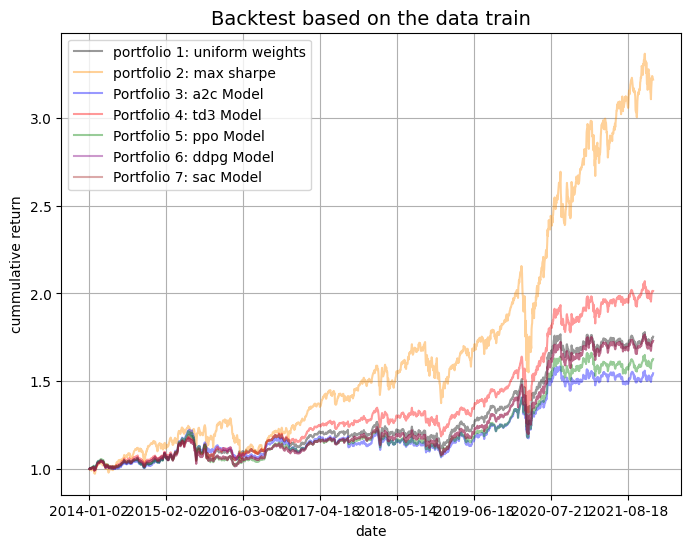

In [3]:
import matplotlib.pylab as plt

result_dir = ""
%store -r result_dir

fig, ax = plt.subplots(figsize=(8, 6))
uw_cum_returns.plot(ax=ax, color="black", alpha=0.4)
max_sharpe_cum_returns.plot(ax=ax, color="darkorange", alpha=0.4)

a2c_train_cum_returns.plot(ax=ax, color="blue", alpha=0.4)
td3_train_cum_returns.plot(ax=ax, color="red", alpha=0.4)
ppo_train_cum_returns.plot(ax=ax, color="green", alpha=0.4)
ddpg_train_cum_returns.plot(ax=ax, color="purple", alpha=0.4)
sac_train_cum_returns.plot(ax=ax, color="brown", alpha=0.4)

plt.legend(loc="best")
plt.grid(True)
ax.set_ylabel("cummulative return")
ax.set_title("Backtest based on the data train", fontsize=14)
fig.savefig(f"{result_dir}/back_test_on_train_data.png")

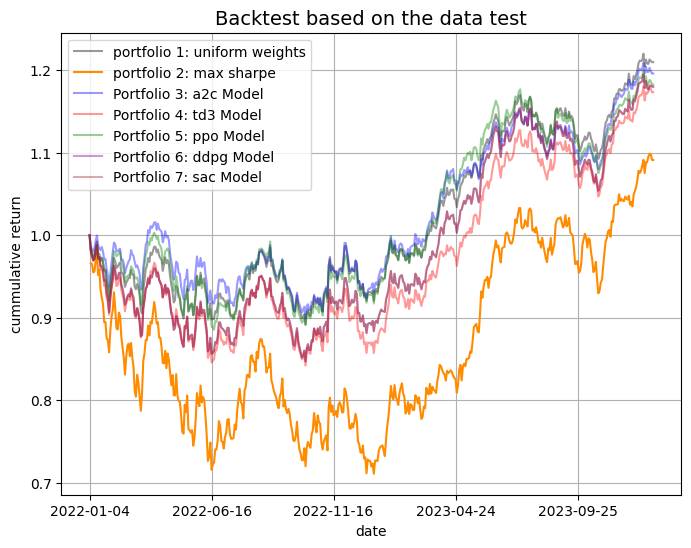

In [4]:
# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_test_returns = returns_test.dot(uw_weights)
uw_test_cum_returns = (1 + uw_test_returns).cumprod()
uw_test_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_test_returns = returns_test.dot(max_sharpe_weights)
max_sharpe_test_cum_returns = (1 + max_sharpe_test_returns).cumprod()
max_sharpe_test_cum_returns.name = "portfolio 2: max sharpe"

a2c_test_cum_returns = (1 + a2c_test_returns["daily_return"]).cumprod()
a2c_test_cum_returns.name = "Portfolio 3: a2c Model"

td3_test_cum_returns = (1 + td3_test_returns["daily_return"]).cumprod()
td3_test_cum_returns.name = "Portfolio 4: td3 Model"

ppo_test_cum_returns = (1 + ppo_test_returns["daily_return"]).cumprod()
ppo_test_cum_returns.name = "Portfolio 5: ppo Model"

ddpg_test_cum_returns = (1 + ddpg_test_returns["daily_return"]).cumprod()
ddpg_test_cum_returns.name = "Portfolio 6: ddpg Model"

sac_test_cum_returns = (1 + sac_test_returns["daily_return"]).cumprod()
sac_test_cum_returns.name = "Portfolio 7: sac Model"

# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8, 6))
uw_test_cum_returns.plot(ax=ax, color="black", alpha=0.4)
max_sharpe_test_cum_returns.plot(ax=ax, color="darkorange")
a2c_test_cum_returns.plot(ax=ax, color="blue", alpha=0.4)
td3_test_cum_returns.plot(ax=ax, color="red", alpha=0.4)
ppo_test_cum_returns.plot(ax=ax, color="green", alpha=0.4)
ddpg_test_cum_returns.plot(ax=ax, color="purple", alpha=0.4)
sac_test_cum_returns.plot(ax=ax, color="brown", alpha=0.4)
plt.legend(loc="best")
plt.grid(True)
ax.set_ylabel("cummulative return")
ax.set_title("Backtest based on the data test", fontsize=14)
fig.savefig(f"{result_dir}/back_test_on_test_data.png")

In [5]:
from utils import perf_stats, backtest_strat

# Get the Portfolio Statistics for all the portfolios
portfolios_returns_dict = {
    "uniform_weights": uw_test_returns,
    "maximum_sharpe": max_sharpe_test_returns,
    "a2c Model": a2c_test_returns["daily_return"],
    "td3 Model": td3_test_returns["daily_return"],
    "ppo Model": ppo_test_returns["daily_return"],
    "ddpg Model": ddpg_test_returns["daily_return"],
    "sac Model": sac_test_returns["daily_return"],
}

portfolios_stats = pd.DataFrame()
for i, j in portfolios_returns_dict.items():
    # Pass the returns into a dataframe
    port_rets_df = pd.DataFrame(j)
    port_rets_df = port_rets_df.reset_index()
    port_rets_df.columns = ["date", "daily_return"]

    # Use the FinRL Library to get the Portfolio Returns
    # This makes use of the Pyfolio Library

    DRL_strat = backtest_strat(port_rets_df)
    perf_stats_all = perf_stats(
        returns=DRL_strat,
        factor_returns=DRL_strat,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    perf_stats_all = pd.DataFrame(perf_stats_all)
    perf_stats_all.columns = ["Statistic"]

    portfolios_stats[i] = perf_stats_all["Statistic"]

portfolios_stats.to_csv(f"{result_dir}/portfolios_stats.csv")
portfolios_stats

,uniform_weights,maximum_sharpe,a2c Model,td3 Model,ppo Model,ddpg Model,sac Model
Annual return,0.109258,0.048647,0.102343,0.090923,0.095633,0.094326,0.094326
Cumulative returns,0.209870,0.091196,0.196049,0.173382,0.182706,0.180114,0.180114
Annual volatility,0.138791,0.249491,0.133613,0.162284,0.140316,0.152395,0.152395
Sharpe ratio,0.818039,0.315071,0.795993,0.617184,0.720999,0.667493,0.667493
Calmar ratio,1.009231,0.168173,0.894947,0.574841,0.815327,0.616493,0.616493
Stability,0.741169,0.377336,0.673808,0.623511,0.686801,0.674361,0.674361
Max drawdown,-0.108259,-0.289269,-0.114357,-0.158172,-0.117294,-0.153004,-0.153004
Omega ratio,1.143671,1.053309,1.138221,1.107512,1.126708,1.115524,1.115524
Sortino ratio,1.215822,0.462310,1.180161,0.915017,1.050583,0.993424,0.993424
Skew,NaN,NaN,0.127750,0.193639,0.030840,0.223423,0.223423


In [6]:
import numpy as np

a2c_test_returns = a2c_test_returns.set_index("date")
td3_test_returns = td3_test_returns.set_index("date")
ppo_test_returns = ppo_test_returns.set_index("date")
ddpg_test_returns = ddpg_test_returns.set_index("date")
sac_test_returns = sac_test_returns.set_index("date")

# Getting the best performing portfolio

ps_cum = [a2c_test_cum_returns, ppo_test_cum_returns, ddpg_test_cum_returns]
ps = [
    a2c_test_returns["daily_return"],
    td3_test_returns["daily_return"],
    ppo_test_returns["daily_return"],
    ddpg_test_returns["daily_return"],
    sac_test_returns["daily_return"],
]

final_return = []
for p in ps_cum:
    final_return.append(p.iloc[-1])

id_ = np.argmax(final_return)
best_p = ps[id_]
best_p.name = (ps_cum[id_]).name

print("Best portfolio: ", best_p.name)
print("Final cumulative return: {:.2f} ".format(final_return[id_]))

Best portfolio:  Portfolio 3: a2c Model
Final cumulative return: 1.20 


In [7]:
# convert the best portfolio into a Dataframe

best_p = pd.DataFrame(best_p)
best_p = best_p.reset_index()
best_p.columns = ["date", "daily_return"]
best_p["date"] = ddpg_test_returns.index
best_p

,date,daily_return
0,2022-01-04,0.000000
1,2022-01-05,-0.012397
2,2022-01-06,-0.005700
3,2022-01-07,-0.001576
4,2022-01-10,0.004201
...,...,...
458,2023-12-26,0.000185
459,2023-12-27,0.004008
460,2023-12-28,-0.003290
461,2023-12-29,-0.002445


Start date,2022-01-04
End date,2023-12-31
Total months,24
,Backtest
Annual return,10.234%
Cumulative returns,19.605%
Annual volatility,13.361%
Sharpe ratio,0.7959931541665689
Calmar ratio,0.8949472237418122
Stability,0.6738075136924648
Max drawdown,-11.436%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,11.44,2022-03-30,2022-10-14,2023-03-21,255
1,6.61,2022-01-04,2022-03-14,2022-03-22,56
2,6.31,2023-07-31,2023-10-26,2023-11-14,77
3,2.88,2023-06-15,2023-06-26,2023-07-12,20
4,2.28,2023-04-20,2023-04-25,2023-05-11,16


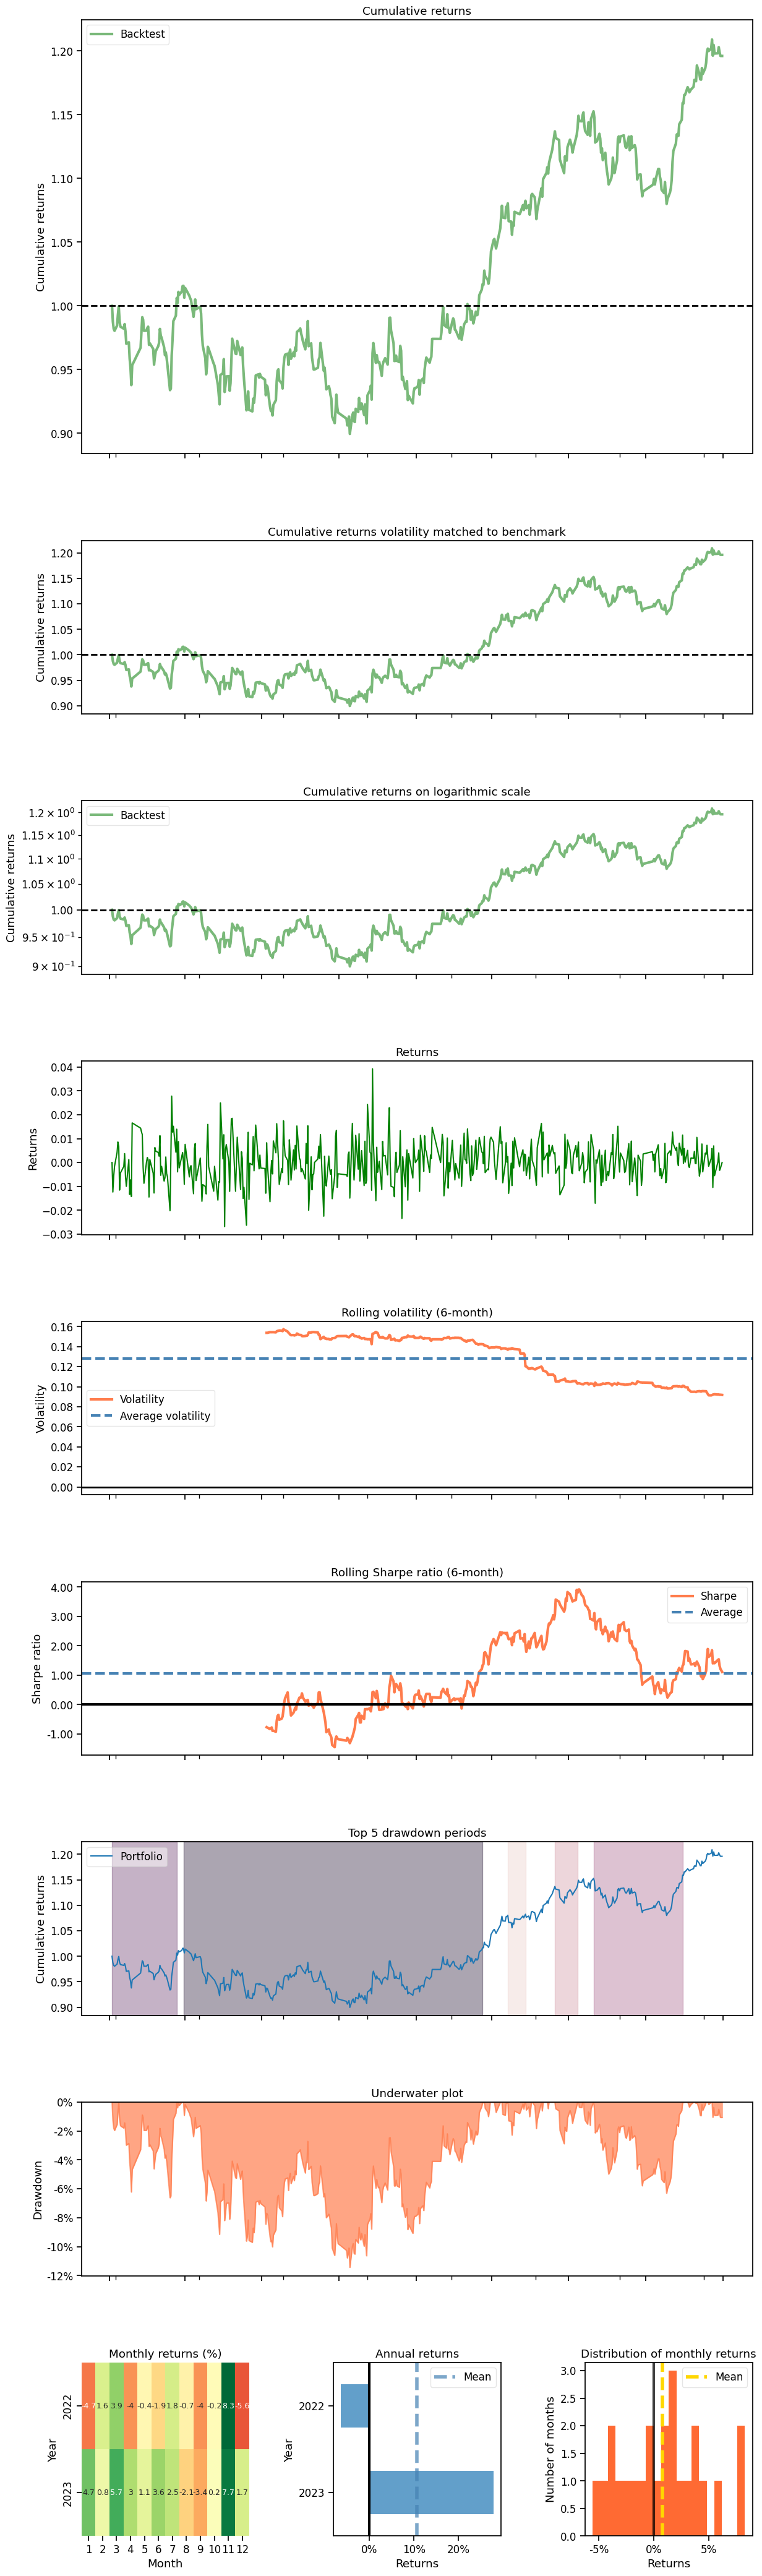

In [28]:
from utils import plotting_context, create_returns_tear_sheet

%matplotlib inline
# Best portfolio stats
best_port_strat = backtest_strat(best_p)
perf_stats_all = perf_stats(
    returns=best_port_strat,
    factor_returns=best_port_strat,
    positions=None,
    transactions=None,
    turnover_denom="AGB",
)
# Get the Benchmarking Plots
with plotting_context(font_scale=1.1):
    create_returns_tear_sheet(returns=best_port_strat, set_context=False)
